In [4]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

/Users/michaeltwardos/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
def powerLaw(t, n):
    #Given the customer's age and power of the probability 
    #returns the expected number of users invited.
    return float(1)/math.pow(t,n)

In [2]:
def computeNewUsersNoS(initialCohort, generations, n, alpha):
        #Given an initial chort size and age dependent virality, 
        #computes the expected cohorts for the next generations.
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                newCohort.append(alpha*cohorts[L-t-1]*powerLaw(t+1, n))
            cohorts.append(sum(newCohort))
        return cohorts
    
#Need to show this step by step graphically in slides

In [3]:
def computeNewUsers(initialCohort, generations, n, alpha, S):
# Includes saturation to limit the amount that virality can grow indefinitely
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                newCohort.append(alpha*cohorts[L-t-1]*powerLaw(t+1, n)*float((S-sum(cohorts)))/(S))
            cohorts.append(sum(newCohort))
        return cohorts
    

In [8]:
aa=computeNewUsersNoS(1000,100, 2.1, 0.67)
bb=computeNewUsersNoS(1000,100, 2.1, 0.65)
cc=computeNewUsersNoS(1000,100, 2.1, 0.6)

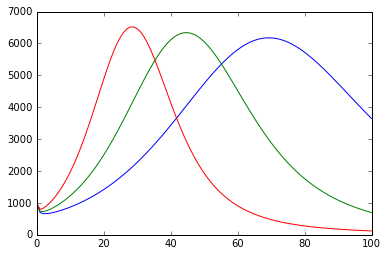

In [19]:


plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [30]:
aa=computeNewUsersNoS(1000,100, 1.9, 0.595)
bb=computeNewUsersNoS(1000,100, 2.1, 0.65)
cc=computeNewUsersNoS(1000,100, 2.3, 0.7)

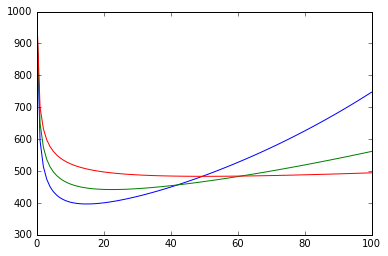

In [31]:
plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [12]:
aa=computeNewUsers(1000,100, 2, 0.7, 2000000)
bb=computeNewUsers(1000,100, 2, 0.74, 1000000)
cc=computeNewUsers(1000,100, 2, 0.8, 500000)

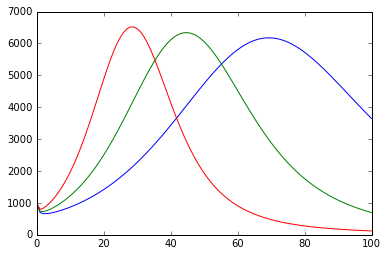

In [33]:
plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [1]:
def computeDAU(cohorts, n):
    L = len(cohorts)
    DAU = [cohorts[1]]
    for i in range(L):
        actives=[]
        for t in range(i):
            actives.append(cohorts[i-t-1]*powerLaw(t+1,n))
        DAU.append(sum(actives))
    return DAU 

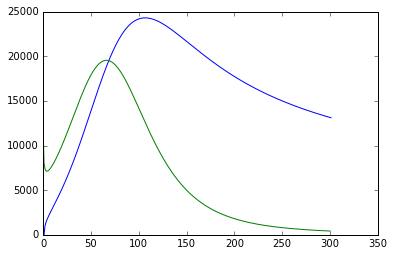

In [32]:
aa=computeNewUsers(1000,300, 2, 0.67, 1000000)
sss=computeDAU(aa, 0.5)

# This shows the DAU and the New Users per day over the first 100 days
plt.plot(sss)
plt.plot([12*i for i in aa])
plt.show()

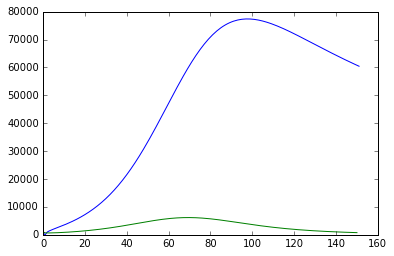

In [15]:
cohort=[]
for i in range(1000):
    cohort.append(1000)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
r1=computeDAU(cohort, 1)
r1p5=computeDAU(cohort, 1.5)
r2=computeDAU(cohort, 2)

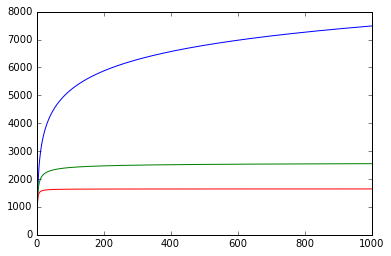

In [25]:
#Why does only a power law of -1 have no convergence???
plt.plot(r1)
plt.plot(r1p5)
plt.plot(r2)
plt.show()

In [19]:
def getChildren(V):
    if  random.random() < V:
        return 1
    else:
        return 0

In [22]:
def computeDescendants(initialCohort, gen, V):
    cohort = initialCohort
    generations = gen
    cohorts=[cohort]
    mx = 1
    for i in range(generations):
        newCohort=[]
        for j in range(cohort):
            newUsers = getChildren(V)
            newCohort.append(newUsers)
        cohort = sum(newCohort)
        cohorts.append(cohort)
    return sum(cohorts)

In [27]:
computeDescendants(10, 100, 0.9)

89

populations7 =[]
for i in range(1000):
    populations7.append(computeDescendants(10, 100, 0.7))


In [46]:
d7 = {x:populations7.count(x) for x in populations8}

In [47]:
 x7, y7 = d7.keys(), d7.values()

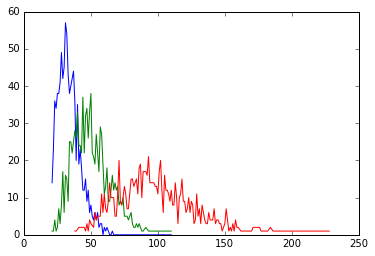

In [48]:
plt.plot(x7,y7)
plt.plot(x8,y8)
plt.plot(x,y)
plt.show()

# Efficiency Modelling

In [ ]:
#Given the probability of the number of items that will need to be bought for tomorrow

p = {0 : 0.25, 1 : 0.25, 2 : 0.25, 3 : 0.25}

# And the cost of buying them today (c) or tomorrow (d)
def computeCost(c, d, x, p):
    before = c*x
    after = []
    for i in p:
        if i > x:
            after.append(d*p[i]*(i-x))
    expectedCost = sum(after) + before
    return expectedCost

#Compute the expected cost for a given number x purchased today

for i in range(4):
    print i, computeCost(1, 3, i, p)
    

In [2]:
# Simple Models

population = [[i,100000*i] for i in range(100)]

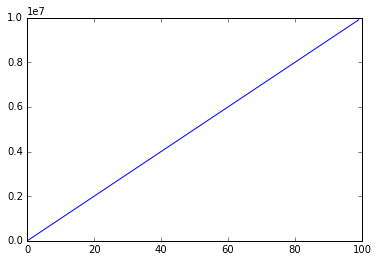

In [7]:
plt.plot([p[0] for p in population] ,[p[1] for p in population])
plt.show()

# Visualizing Cohort Churn

In [106]:
def linearChurn(initialCohort, age, loss, variance):
    a = round(initialCohort*(1-age*loss) + initialCohort*variance*(random.random()-0.5))
    if a > 0:
        return a
    else:
        return 0

In [108]:
x=linearChurn(1000, 10, 0.05, 0.1)
print x

491.0


In [125]:
cohorts = []

#Simulate a list of cohort sizes as a function of age and time
for j in range(40):
    item=[(i, 40+i-j, linearChurn(1000000*(0.9 + 0.2*random.random()), i, 0.05, 0.1))  for i in range(j)]
    cohorts.append(item)

In [242]:
cohorts = []

#Simulate a list of cohort sizes as a function of age and time
for j in range(40):
    item=[(i, 40+i-j, 1000000*powerLaw(i+1,1))  for i in range(j)]
    cohorts.append(item)

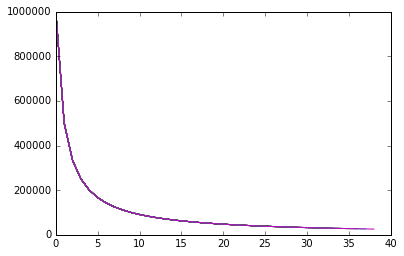

In [142]:
# This is a very reasonable retention curve
for j in range(40):
    plt.plot([p[0] for p in cohorts[j]] ,[p[2] for p in cohorts[j]]) 

plt.show()

In [243]:
def computePopulation(t):
    population =[]
    for cohort in cohorts:
        for time in cohort:
            if time[1] == t:
                population.append(time[2])
    return sum(population)

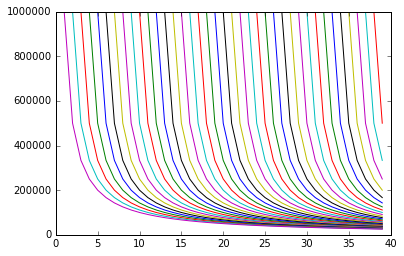

In [143]:
dicy=[]
for j in range(40):
    plt.plot([p[1] for p in cohorts[j]] ,[p[2] for p in cohorts[j]]) 
    for p in cohorts[j]:
        dicy.append((p[1], p[2]))
plt.show()


#How do we visualize this as a triangle?  Very important to do!

In [87]:
computePopulation(19)

10509795.0

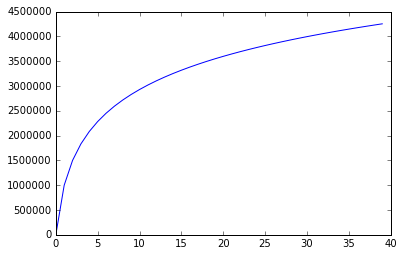

In [144]:
#What happened at about 15 months?? 
plt.plot(range(40), [computePopulation(i) for i in range(40)])
plt.show()

In [ ]:
#Figure out how to visualize the conribution to the population from each cohort

In [145]:
# How do you project forward given linear churn and power law churn

# L28

In [235]:
import math
cohort = 1000000
probabilities = [float(math.floor(9*random.random()))/10 for i in range(cohort)]
users = [[]] 
print(len(users))
for i in range(28):
    week =[]
    for q in range(cohort):
        if random.random() > probabilities[q]:
            week.append(1)
        else:
            week.append(0) 
    users.append(week)

1


In [236]:
activities = users[1:29]

In [237]:
import numpy

dataN=[]
for activity in activities:
    dataN.append(numpy.array(activity))



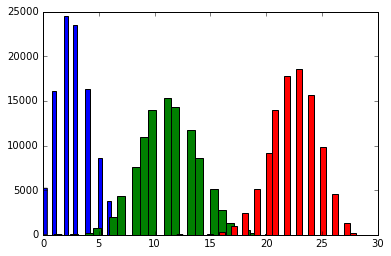

In [230]:
plt.hist(sum(dataP9), bins=29)
plt.hist(sum(dataP6), bins=30)
plt.hist(sum(dataP2), bins=30)

plt.show()

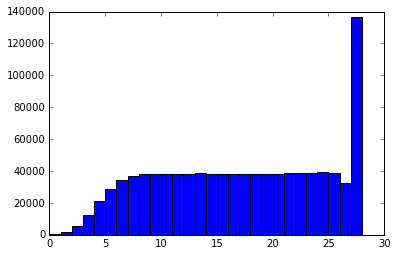

In [240]:
plt.hist(sum(dataN), bins=28)
plt.show()